# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# URL
url = "http://api.openweathermap.org/data/2.5/weather?"

units = "imperial"
desired_keys = ['clouds.all','sys.country','dt','main.humidity','main.temp_max','wind.speed','coord.lat','coord.lon']
    
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}"

In [ ]:
# city = "cape town"
# query_url = f"{url}appid={weather_api_key}&units={units}&q="+ city
# output = requests.get(query_url).json()
# output

In [4]:
# Create Lists
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [5]:
# counter to count the number of calls to API
count = 1
 # counter to count the number of call sets
sets = 1

print("Beginning Data Retrieval \n -------------------------")
for city in cities:
    
    try:
        response = requests.get(f"{query_url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {count} of Set {sets} |  {city}")
        count = count+1
        time.sleep(1.01)
    except:
        print("City not found. Skipping...")
    
    # loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
    if count == 51: 
        count = 1 
        sets = sets+1

print("------------------------- \nData Retrieval Complete \n-------------------------")

Beginning Data Retrieval 
 -------------------------
Processing Record 1 of Set 1 |  biak
Processing Record 2 of Set 1 |  cabo san lucas
Processing Record 3 of Set 1 |  kapaa
Processing Record 4 of Set 1 |  ikot ekpene
Processing Record 5 of Set 1 |  airai
Processing Record 6 of Set 1 |  maceio
City not found. Skipping...
Processing Record 7 of Set 1 |  san cristobal
Processing Record 8 of Set 1 |  saint george
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 1 |  bluff
Processing Record 10 of Set 1 |  atuona
City not found. Skipping...
Processing Record 11 of Set 1 |  rikitea
Processing Record 12 of Set 1 |  puerto ayora
Processing Record 13 of Set 1 |  jamestown
Processing Record 14 of Set 1 |  matay
Processing Record 15 of Set 1 |  bud
Processing Record 16 of Set 1 |  bilibino
Processing Record 17 of Set 1 |  bilma
Processing Record 18 of Set 1 |  yatou
Processing Record 19 of Set 1 |  fortuna
Processing Record 20 of Set 1 |  albany
Processing Recor

Processing Record 34 of Set 4 |  katsuura
Processing Record 35 of Set 4 |  san jose
Processing Record 36 of Set 4 |  castro
Processing Record 37 of Set 4 |  kamaishi
Processing Record 38 of Set 4 |  srednekolymsk
Processing Record 39 of Set 4 |  padang
Processing Record 40 of Set 4 |  mantua
Processing Record 41 of Set 4 |  ust-tsilma
Processing Record 42 of Set 4 |  raudeberg
Processing Record 43 of Set 4 |  karasburg
Processing Record 44 of Set 4 |  abu samrah
Processing Record 45 of Set 4 |  nouakchott
Processing Record 46 of Set 4 |  los llanos de aridane
Processing Record 47 of Set 4 |  noumea
Processing Record 48 of Set 4 |  port lincoln
Processing Record 49 of Set 4 |  chimbote
Processing Record 50 of Set 4 |  tomakomai
Processing Record 1 of Set 5 |  mayya
Processing Record 2 of Set 5 |  east london
Processing Record 3 of Set 5 |  zhigansk
Processing Record 4 of Set 5 |  christchurch
Processing Record 5 of Set 5 |  salinas
Processing Record 6 of Set 5 |  shu
Processing Record 7

Processing Record 18 of Set 8 |  athabasca
Processing Record 19 of Set 8 |  coruripe
City not found. Skipping...
Processing Record 20 of Set 8 |  nemuro
Processing Record 21 of Set 8 |  banda
Processing Record 22 of Set 8 |  tsilna
Processing Record 23 of Set 8 |  sur
Processing Record 24 of Set 8 |  fushun
Processing Record 25 of Set 8 |  great yarmouth
Processing Record 26 of Set 8 |  kirkland lake
Processing Record 27 of Set 8 |  paamiut
Processing Record 28 of Set 8 |  salym
Processing Record 29 of Set 8 |  havre-saint-pierre
Processing Record 30 of Set 8 |  solnechnyy
Processing Record 31 of Set 8 |  loksa
Processing Record 32 of Set 8 |  ilulissat
Processing Record 33 of Set 8 |  salalah
City not found. Skipping...
Processing Record 34 of Set 8 |  hakkari
Processing Record 35 of Set 8 |  magistralnyy
City not found. Skipping...
Processing Record 36 of Set 8 |  dorado
Processing Record 37 of Set 8 |  narsaq
Processing Record 38 of Set 8 |  maldonado
Processing Record 39 of Set 8 |

Processing Record 49 of Set 11 |  piranshahr
Processing Record 50 of Set 11 |  middleton
City not found. Skipping...
City not found. Skipping...
Processing Record 1 of Set 12 |  sept-iles
Processing Record 2 of Set 12 |  villena
Processing Record 3 of Set 12 |  tahoua
Processing Record 4 of Set 12 |  coquimbo
Processing Record 5 of Set 12 |  tenabo
Processing Record 6 of Set 12 |  sirohi
Processing Record 7 of Set 12 |  santos dumont
Processing Record 8 of Set 12 |  lixourion
------------------------- 
Data Retrieval Complete 
-------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df = pd.DataFrame({
     'City':city_name,
     'Cloudiness':cloudiness,
     'Country':country,
     'Date':date,
     'Humidity':humidity,
     'Lat':lat,
     'Lng':lng,
     'Max Temp':max_temp,
     'Wind Speed':wind_speed,
     })
weather_df.count()

City          558
Cloudiness    558
Country       558
Date          558
Humidity      558
Lat           558
Lng           558
Max Temp      558
Wind Speed    558
dtype: int64

In [7]:
# Export the city data into a .csv.
weather_df.to_csv('../output_data/weatheroutput.csv')

In [8]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Biak,98,ID,1584394243,71,-0.91,122.88,80.87,5.70
1,Cabo San Lucas,20,MX,1584393951,47,22.89,-109.91,82.99,6.93
2,Kapaa,90,US,1584394246,94,22.08,-159.32,73.40,26.40
3,Ikot Ekpene,100,NG,1584394247,77,5.18,7.71,82.49,7.99
4,Airai,46,TL,1584393660,83,-8.93,125.41,64.13,3.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

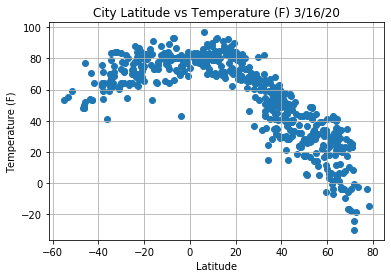

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a Scatter Plot for temperature vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title("City Latitude vs Temperature (F) 3/16/20")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig1")

This Scatter Plot shows the closer the city is to the equator, the higher the temperature.
The Southern Hemisphere appears to have higher temperatures than the Northern Hemisphere.

#### Latitude vs. Humidity Plot

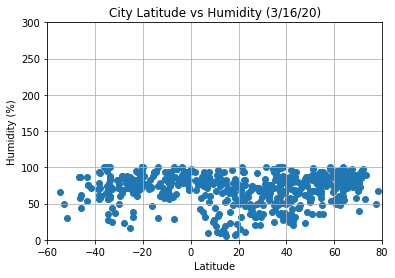

<Figure size 432x288 with 0 Axes>

In [14]:
# Create a Scatter Plot for humidity vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xlim(-60,80)
plt.ylim(0,300)
plt.title("City Latitude vs Humidity (3/16/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig2")

According to the scatter plot, Humidity % is spread out evenly across latitude. 

#### Latitude vs. Cloudiness Plot

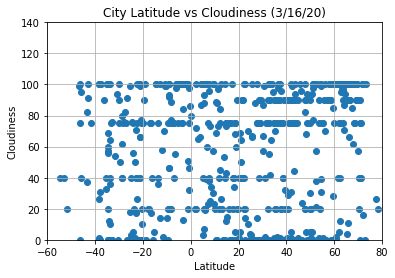

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a Scatter Plot for cloudiness vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.xlim(-60,80)
plt.ylim(0,140)
plt.title("City Latitude vs Cloudiness (3/16/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig3")

There deos not appear to be any correlation between City Latitude and Cloudiness. 

#### Latitude vs. Wind Speed Plot

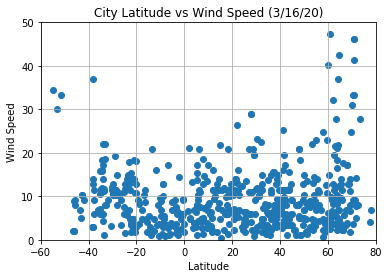

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a Scatter Plot for wind speed vs latitude
x_values = weather_df['Lat']
y_values = weather_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.xlim(-60,80)
plt.ylim(0,50)
plt.title("City Latitude vs Wind Speed (3/16/20)")
plt.grid()
plt.show()

# Save Figure
plt.savefig("../output_data/Fig4")

Wind Speed is pretty even throughout the various cities across latitudes. There does not seem to be any correlation between city latitude and wind speed. 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [17]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_df.loc[weather_df["Lat"]>0.01]
southern_hemisphere = weather_df.loc[weather_df["Lat"]<-0.01]

northern_hemisphere.head()
# southern_hemisphere.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
1,Cabo San Lucas,20,MX,1584393951,47,22.89,-109.91,82.99,6.93
2,Kapaa,90,US,1584394246,94,22.08,-159.32,73.40,26.40
3,Ikot Ekpene,100,NG,1584394247,77,5.18,7.71,82.49,7.99
6,San Cristobal,40,VE,1584394094,52,7.77,-72.22,87.80,12.75
7,Saint George,1,US,1584394072,36,37.10,-113.58,68.00,5.82


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: -0.8992839700777672


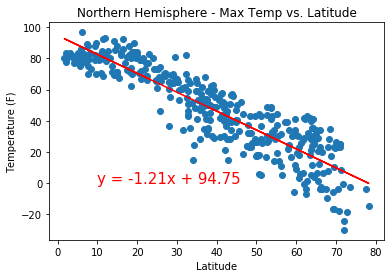

In [18]:
## Convert to floats and store Max Temp and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very strong correlation (R-square of -0.899) between Temp and Latitude in the Northern Hemisphere. 
The closer the city to the equator, the higher the temperature.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squard: 0.5910970347722745


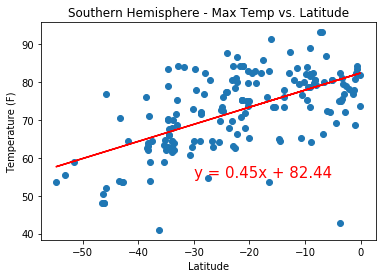

In [19]:
## Convert to floats and store Max Temp and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,55),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a strong correlation (R-squared of 0.591) between temperature and city latitude in the Southern Hemisphere. 
The closer the city to the equator, the higher the temperature.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.30954729639423195


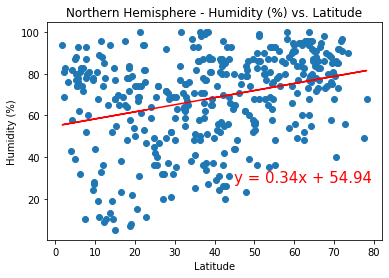

In [20]:
## Convert to floats and store Humidity and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.31) between Humidity % and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squard: 0.30430936628869404


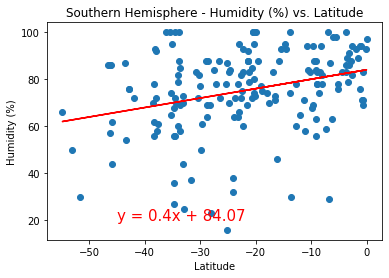

In [21]:
## Convert to floats and store Humidity and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.304) between Humidity % and City Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.16011497954992018


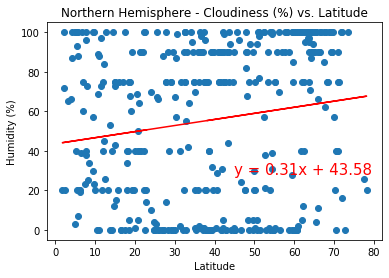

In [22]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very weak correlation (R-squared of 0.16) between Cloudiness % and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squard: 0.21383200834781893


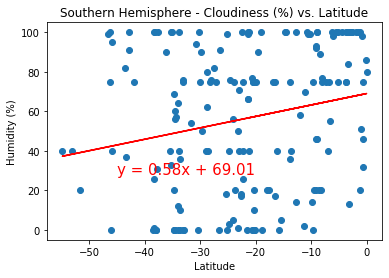

In [23]:
## Convert to floats and store Cloudiness and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of 0.214) between Cloudiness % and City Latitude in the Southern Hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: 0.07758553567282127


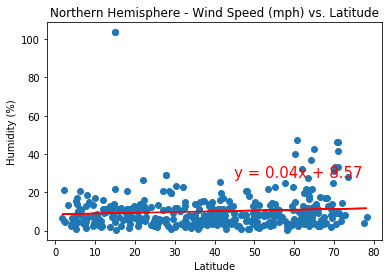

In [24]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = northern_hemisphere['Lat'].astype('float')
y_values = northern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,28),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a very weak correlation (R-squared of 0.078) between Wind Speed (mph) and City Latitude in the Northern Hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squard: -0.4230220818647408


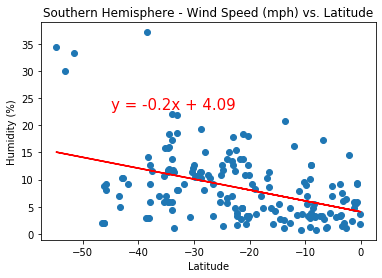

In [25]:
## Convert to floats and store Wind Speed and Latitude as x and y values
x_values = southern_hemisphere['Lat'].astype('float')
y_values = southern_hemisphere['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,23),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude')

# Print r square value
print(f"R squard: {rvalue}")

# Show plot
plt.show()

There is a weak correlation (R-squared of -0.423) between Wind Speed (mph) and City Latitude in the Southern Hemisphere.